Best solution found: Solution(parameters=[0.1984309738518153, 0.6693514365065156, 0.13005381963556717, 1.4679183863247958, 0.6693711756331933])
Fitness of the best solution: 3.135125791951887


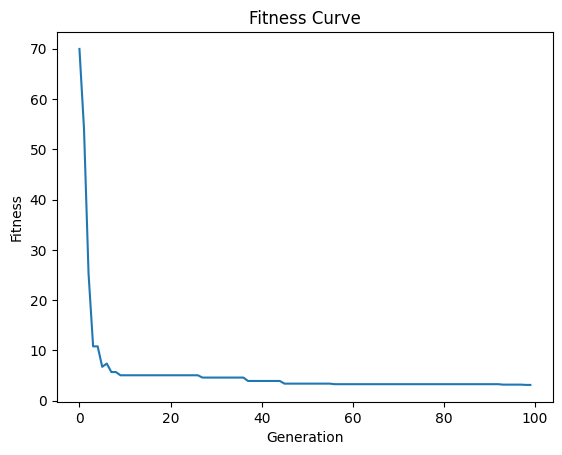

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random

class Solution:
    """ Class to represent individual solutions in the genetic algorithm. """
    def __init__(self, parameters):
        self.parameters = parameters

    def calculate_fitness(self):
        """ Calculate fitness as the sum of parameters. Lower is better. """
        return np.sum(self.parameters)

    def __repr__(self):
        return f"Solution(parameters={self.parameters})"

def generate_initial_population(pop_size, num_parameters):
    """ Generate an initial population of solutions with random parameters. """
    return [Solution(np.random.uniform(low=0, high=100, size=num_parameters)) for _ in range(pop_size)]

class GeneticAlgorithm:
    """ Class to manage the genetic algorithm operations. """
    def __init__(self, pop_size, num_parameters, max_generations, mutation_rate):
        self.pop_size = pop_size
        self.num_parameters = num_parameters
        self.max_generations = max_generations
        self.mutation_rate = mutation_rate
        self.population = generate_initial_population(pop_size, num_parameters)
        self.fitness_curve = []

    def evolve_population(self):
        """ Perform selection, crossover, and mutation to evolve the population. """
        self.population = self.selection_crossover_and_mutation()

    def selection_crossover_and_mutation(self):
        new_population = []
        parents = sorted(self.population, key=lambda x: x.calculate_fitness())[:len(self.population)//2]
        while len(new_population) < self.pop_size:
            parent1, parent2 = random.sample(parents, 2)
            child = self.crossover(parent1, parent2)
            self.mutate(child)
            new_population.append(child)
        return new_population

    def crossover(self, parent1, parent2):
        """ Perform crossover between two parents to create a new child. """
        child_parameters = [random.choice([p1, p2]) for p1, p2 in zip(parent1.parameters, parent2.parameters)]
        return Solution(child_parameters)

    def mutate(self, solution):
        """ Mutate a solution's parameters with a given mutation rate. """
        solution.parameters = [np.random.uniform(0, 100) if random.random() < self.mutation_rate else p for p in solution.parameters]

    def run(self):
        """ Run the genetic algorithm over a set number of generations. """
        for _ in range(self.max_generations):
            self.evolve_population()
            best_solution = min(self.population, key=lambda x: x.calculate_fitness())
            self.fitness_curve.append(best_solution.calculate_fitness())

class BoilerDesignProblem:
    """ Class to setup and solve the boiler design problem using genetic algorithms. """
    def __init__(self, num_parameters=5, pop_size=100, max_generations=100, mutation_rate=0.01):
        self.ga = GeneticAlgorithm(pop_size, num_parameters, max_generations, mutation_rate)

    def solve(self):
        """ Solve the boiler design problem and print the best solution. """
        self.ga.run()
        best_solution = min(self.ga.population, key=lambda x: x.calculate_fitness())
        print(f"Best solution found: {best_solution}")
        print(f"Fitness of the best solution: {best_solution.calculate_fitness()}")

    def plot_fitness_curve(self):
        """ Plot the fitness curve of the best solutions over generations. """
        plt.plot(self.ga.fitness_curve)
        plt.title('Fitness Curve')
        plt.xlabel('Generation')
        plt.ylabel('Fitness')
        plt.show()

if __name__ == "__main__":
    problem = BoilerDesignProblem()
    problem.solve()
    problem.plot_fitness_curve()


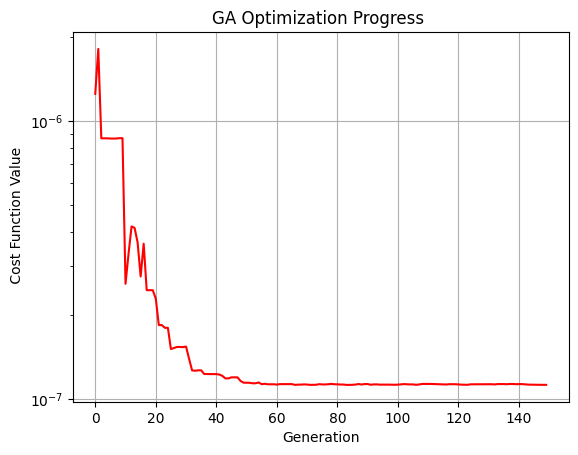

In [21]:
import numpy as np
import matplotlib.pyplot as plt

class Member:
    def __init__(self, num_variables, var_min, var_max):
        self.position = np.random.uniform(var_min, var_max, num_variables)
        self.cost_value, self.constraints_violation = self.calculate_cost()

    def calculate_cost(self):
        #Calculate the objective function
        cost = (0.6224 * self.position[0] * self.position[2] * self.position[3]) + \
               (1.7781 * self.position[1] * self.position[2]**2) + \
               (3.1661 * self.position[0]**2 * self.position[3]) + \
               (19.84 * self.position[0]**2 * self.position[2])

        g = np.zeros(4)
        g[0] = -self.position[0] - 0.0193 * self.position[2]
        g[1] = -self.position[1] - 0.00954 * self.position[2]
        g[2] = -np.pi * self.position[2]**2 * self.position[3] - \
               (4.0 / 3.0) * np.pi * self.position[2]**3 + 1296000
        g[3] = self.position[3] - 240

        constraints_violation = np.sum(np.where(g > 0, g, 0))
        penalty_factor = 100000
        cost += penalty_factor * constraints_violation

        return cost, constraints_violation

class GeneticAlgorithm:
    def __init__(self, num_variables, var_min, var_max, num_population, max_generations):
        self.num_variables = num_variables
        self.var_min = var_min
        self.var_max = var_max
        self.num_population = num_population
        self.max_generations = max_generations
        self.population = [Member(num_variables, var_min, var_max) for _ in range(num_population)]
        self.best_cost_per_generation = []

    def uniform_crossover(self, x1, x2):
        gamma = 0.1
        alpha = np.random.uniform(-gamma, 1 + gamma, np.shape(x1))
        return alpha * x1 + (1 - alpha) * x2

    def normal_mutation(self, x):
        mutation_rate = 0.1
        mutation_indices = np.where(np.random.rand(*x.shape) < mutation_rate)
        mutation_strength = 0.001
        delta = mutation_strength * np.random.randn(*x.shape) * (self.var_max - self.var_min)
        x[mutation_indices] += delta[mutation_indices]
        return x

    def run(self):
        for generation in range(self.max_generations):
            for member in self.population:
                if np.random.rand() < 0.5:
                    other_member = np.random.choice(self.population)
                    member.position = self.uniform_crossover(member.position, other_member.position)

                member.position = self.normal_mutation(member.position)
                member.position = np.clip(member.position, self.var_min, self.var_max)
                member.cost_value, member.constraints_violation = member.calculate_cost()

            best_member = min(self.population, key=lambda m: m.cost_value)
            self.best_cost_per_generation.append(best_member.cost_value)

        return self.best_cost_per_generation

if __name__ == "__main__":
    # new data
    num_variables = 4
    var_min = np.array([0, 0, 10, 10])
    var_max = np.array([100, 100, 200, 200])
    num_population = 50
    max_generations = 150

    # run ga
    ga = GeneticAlgorithm(num_variables, var_min, var_max, num_population, max_generations)
    best_costs = ga.run()

    # Convert the cost to the inverse number to display it
    inverted_costs = [1.0 / cost if cost != 0 else 0 for cost in best_costs]

    #results 
    plt.figure()
    plt.semilogy(inverted_costs, 'r-')
    plt.xlabel('Generation')
    plt.ylabel(' Cost Function Value')
    plt.title('GA Optimization Progress ')
    plt.grid(True)
    plt.show()
